 # Model evaluation challenge - US Income

## Importing the Libraries

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
sns.set(style='white', context='notebook', palette='deep')



## Loading and exploring the dataset

In [2]:
# Load training and test data into pandas dataframes
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

# merge training and test sets into one dataframe
full = pd.concat([train, test])

In [3]:
# Get size of dataframes
for dataframe in [train, test, full]:
    print(dataframe.shape)

(32561, 15)
(16281, 15)
(48842, 15)


In [4]:
# Number of null values in train and test data

train.isnull().sum().sum()
test.isnull().sum().sum()

0

In [5]:
full.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0
5,37,2,284582,3,14,1,1,2,0,1,0,0,40,0,0
6,49,2,160187,4,5,3,4,0,1,1,0,0,16,2,0
7,52,1,209642,1,9,1,1,1,0,0,0,0,45,0,1
8,31,2,45781,3,14,0,3,0,0,1,14084,0,50,0,1
9,42,2,159449,0,13,1,1,1,0,0,5178,0,40,0,1


In [6]:
full.dtypes


age               int64
workclass         int64
fnlwgt            int64
education         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
income            int64
dtype: object

In [ ]:
sns.pairplot(full)
plt.show()

In [11]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week',]

# Identify Categorical features
cat_features = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country','income']

<AxesSubplot:>

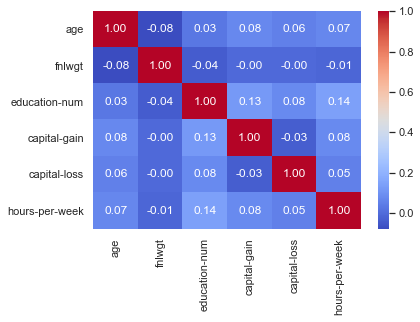

In [12]:
# Correlation matrix between numerical values
g = sns.heatmap(full[numeric_features].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


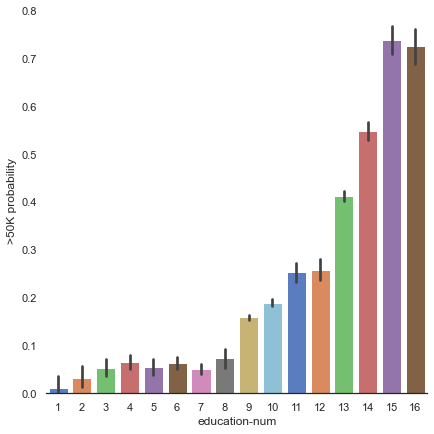

In [13]:
# Explore Education Num vs Income
g = sns.factorplot(x="education-num",y="income",data=full,kind="bar",size = 6,palette = "muted")
g.despine(left=True)
g = g.set_ylabels(">50K probability")

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


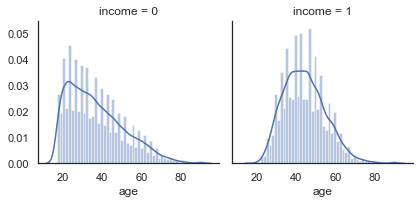

In [14]:
# Explore Age vs Income
g = sns.FacetGrid(full, col='income')
g = g.map(sns.distplot, "age")
g

Text(0, 0.5, 'Income >50K Probability')

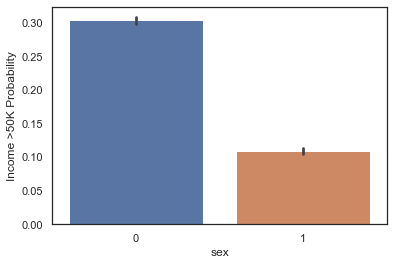

In [15]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=full)
g = g.set_ylabel("Income >50K Probability")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


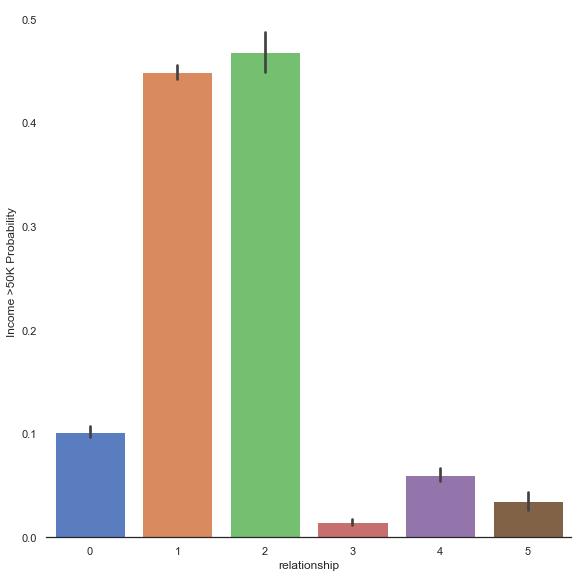

In [16]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=full,kind="bar", size = 8,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g

C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\seaborn\categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


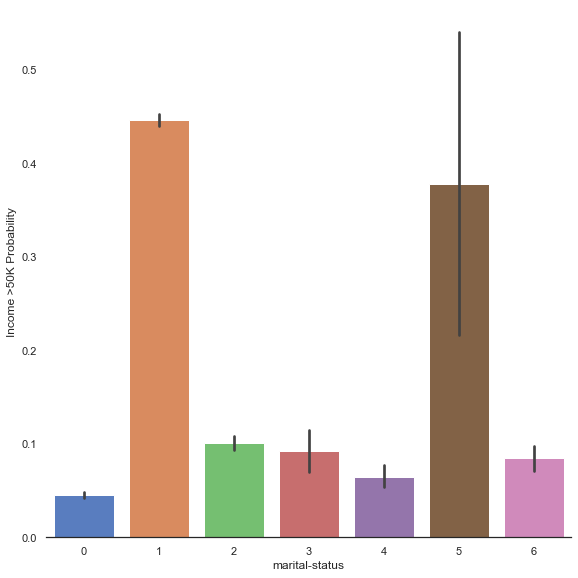

In [17]:
# Explore Marital Status vs Income
g = sns.factorplot(x="marital-status",y="income",data=full,kind="bar", size = 8 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g

In [32]:
full[cat_features].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
income            0
dtype: int64

In [34]:
X = full.drop('income',axis=1)
y = full.income

In [35]:
X.shape,y.shape

((48842, 14), (48842,))

## Encoding

In [37]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
categorical=['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
encoder = ce.OneHotEncoder()
transformer = ColumnTransformer([('one_hot',encoder,categorical)],
                               remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X



C:\Users\maryame\miniconda3\envs\Data-cleaning\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[   0,    0,    0, ..., 2174,    0,   40],
       [   1,    0,    1, ...,    0,    0,   13],
       [   2,    1,    2, ...,    0,    0,   40],
       ...,
       [   2,    0,    1, ...,    0,    0,   50],
       [   2,    0,    2, ..., 5455,    0,   40],
       [   6,    0,    1, ...,    0,    0,   60]], dtype=int64)

In [38]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,0,0,0,0,0,0,0,39,77516,13,2174,0,40
1,1,0,1,1,1,0,0,0,50,83311,13,0,0,13
2,2,1,2,2,0,0,0,0,38,215646,9,0,0,40
3,2,2,1,2,1,1,0,0,53,234721,7,0,0,40
4,2,0,1,3,2,1,1,1,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,2,0,2,3,0,0,1,0,39,215419,13,0,0,36
48838,5,1,6,11,5,1,0,0,64,321403,9,0,0,40
48839,2,0,1,3,1,0,0,0,38,374983,13,0,0,50
48840,2,0,2,0,3,2,0,0,44,83891,13,5455,0,40


In [39]:
transformed_X.shape

(48842, 14)

In [40]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler_transformed=scaler.fit_transform(transformed_X)
scaler_transformed.shape

(48842, 14)

## Model - Random Forest

In [46]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler_transformed=scaler.fit_transform(transformed_X)
scaler_transformed.shape

(48842, 14)

### Splitting the dataset into the Training set and Test set

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test = train_test_split(scaler_transformed,y,test_size=0.3,random_state=0)

In [45]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39073, 14) (34189,)
(9769, 14) (14653,)


In [49]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### Prediction accuracy score & n-estimators 

In [51]:
y_pred = rfc.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_score(y_test,y_pred)


0.8599604176619122

In [54]:
# n_estimators=100
rfc_100 = RandomForestClassifier(n_estimators=100,random_state=0)
rfc_100.fit(X_train,y_train)
y_pred_100 = rfc_100.predict(X_test)

In [55]:
accuracy_score(y_test,y_pred_100)

0.8599604176619122

-> I have used all the features given in the model.
NEXT, I will select only the important features, build the model using these features and see its effect on accuracy.

First, I will create the Random Forest model as follow

In [56]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [57]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [58]:
clf.feature_importances_

array([0.03816258, 0.02638483, 0.09154281, 0.07309207, 0.06832234,
       0.01347237, 0.01806927, 0.01681837, 0.15199446, 0.17300073,
       0.09569531, 0.11944112, 0.03451973, 0.07948401])

### confusion matrix

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10426   774]
 [ 1278  2175]]


0.8599604176619122

In [63]:
cm_matrix = pd.DataFrame(data=cm,columns=['Actual Positive:1',
                                         'Actual Negative:0'],
                        index=['Predict Positive:1',
                              'Predict Negative:0'])
cm_matrix


,Actual Positive:1,Actual Negative:0
Predict Positive:1,10426,774
Predict Negative:0,1278,2175


<AxesSubplot:>

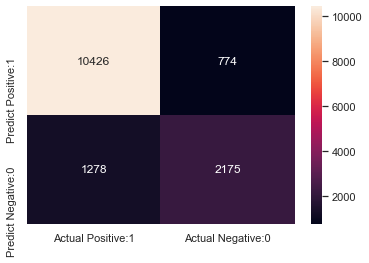

In [64]:
sns.heatmap(cm_matrix,annot=True,fmt='d')

### Applying k-Fold Cross Validation

In [73]:
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

In [74]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [75]:
# create model
model = RandomForestClassifier()

In [77]:
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)


print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.780 (0.098)


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     11200
           1       0.74      0.63      0.68      3453

    accuracy                           0.86     14653
   macro avg       0.81      0.78      0.79     14653
weighted avg       0.85      0.86      0.86     14653



### Randomforestclassifier with no hyperparameter tuning



In [ ]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)

In [21]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=5, min_samples_leaf=2, max_features='auto', bootstrap=True, n_jobs=-1, random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)


In [22]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

[[7002  412]
 [ 905 1450]]
0.8651857917903573


## RandomTreeClassifier hyperparameter tuning by RandomizedSearchCV

In [23]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


## Chose the best parameters

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 250, cv = 10, verbose=7, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 11.7min


KeyboardInterrupt: 